In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Ques 1
## Prepare a model for glass classification using KNN

### Data Description:

### RI : refractive index

### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

### Mg: Magnesium

### AI: Aluminum

### Si: Silicon

### K:Potassium

### Ca: Calcium

### Ba: Barium

### Fe: Iron

### Type: Type of glass: (class attribute)
### 1 -- building_windows_float_processed
### 2 --building_windows_non_float_processed
### 3 --vehicle_windows_float_processed
### 4 --vehicle_windows_non_float_processed (none in this database)
### 5 --containers
### 6 --tableware
### 7 --headlamps

In [2]:
glass_df = pd.read_csv("glass.csv")

In [3]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass_df.drop_duplicates(inplace=True)

<Axes: xlabel='Mg', ylabel='Count'>

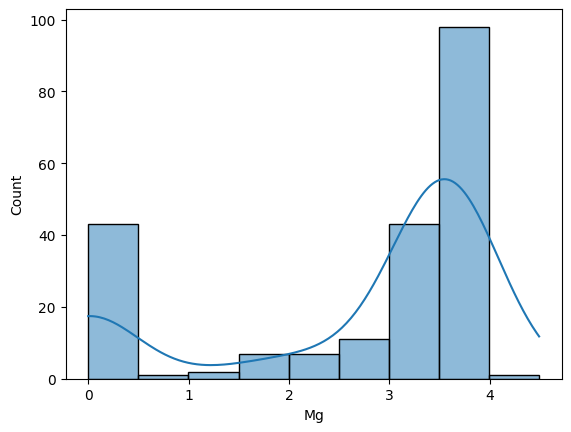

In [7]:
sns.histplot(data = glass_df , x = "Mg" , kde=True)

<Axes: xlabel='K'>

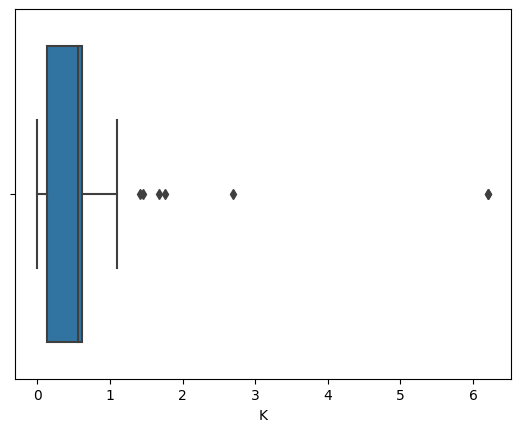

In [8]:
sns.boxplot(data = glass_df , x = "K" )

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X = glass_df.drop("Type" , axis =1)
y = glass_df["Type"]

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
SS = StandardScaler()

In [13]:
SS.fit(X_train)

StandardScaler()

In [14]:
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)

In [15]:
X_train = pd.DataFrame(data=X_train , columns=X.columns)

In [16]:
X_test = pd.DataFrame(data=X_test , columns=X.columns)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

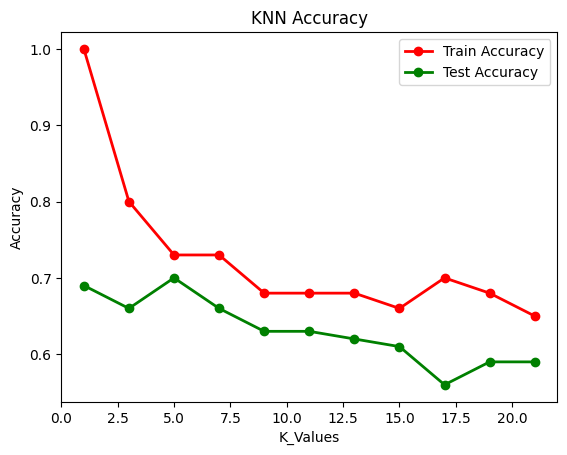

In [19]:
train_score = []
test_score = []
for i in range(1,23,2):
    knn = KNeighborsClassifier(n_neighbors=i )
    knn.fit(X_train , y_train)
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    test_acc  = accuracy_score(y_test , test_pred)
    train_acc = accuracy_score(y_train , train_pred)
    train_score.append(train_acc.round(2))
    test_score.append(test_acc.round(2))

plt.plot(range(1,23,2),train_score ,'ro-', label='Train Score', linewidth=2)
plt.plot(range(1,23,2),test_score ,'go-', label='Test Score', linewidth=2 )
plt.title("KNN Accuracy")
plt.xlabel("K_Values")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Test Accuracy"], loc ="upper right");

In [20]:
# Finalizing K = 5

In [21]:
knn = KNeighborsClassifier(n_neighbors= 5 )
knn.fit(X_train , y_train)
test_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)
test_acc  = accuracy_score(y_test , test_pred)
train_acc = accuracy_score(y_train , train_pred)

In [22]:
print(f"Training Accuracy is --> {train_acc.round(2)}")
print(f"Testing Accuracy is --> {test_acc.round(2)}")

Training Accuracy is --> 0.73
Testing Accuracy is --> 0.7


In [23]:
cm_train = confusion_matrix(y_train , train_pred)
cm_test = confusion_matrix(y_test ,test_pred)

	 Training Confusion Matrix


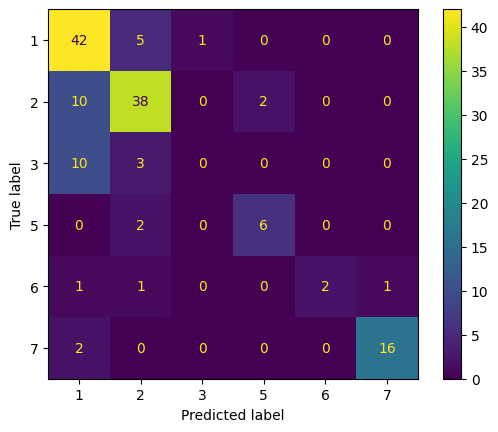

In [24]:
print("\t Training Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=knn.classes_)
disp.plot()
plt.show()

	 Testing Confusion Matrix


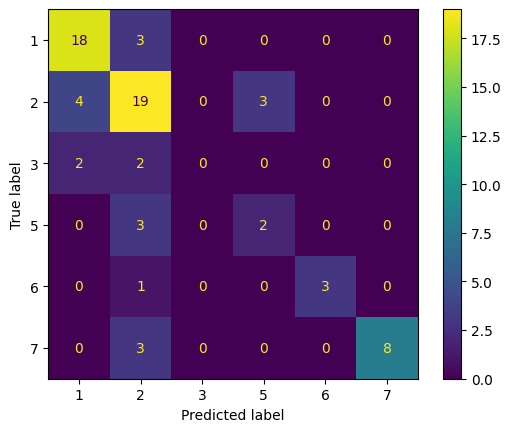

In [25]:
print("\t Testing Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=knn.classes_)
disp.plot()
plt.show()

# Ques 2
## Implement a KNN model to classify the animals in to categorie

In [26]:
zoo_df = pd.read_csv("Zoo.csv")

In [27]:
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [28]:
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [29]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [30]:
zoo_df.drop_duplicates(inplace=True)

<Axes: xlabel='domestic', ylabel='count'>

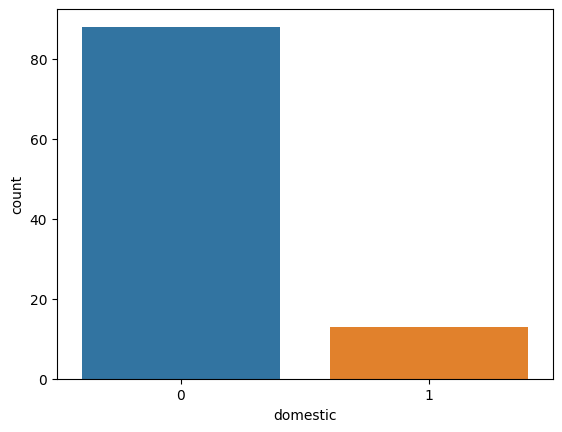

In [31]:
sns.countplot(data=zoo_df , x="domestic")

In [32]:
zoo_df.drop("animal name" , axis=1 , inplace=True)

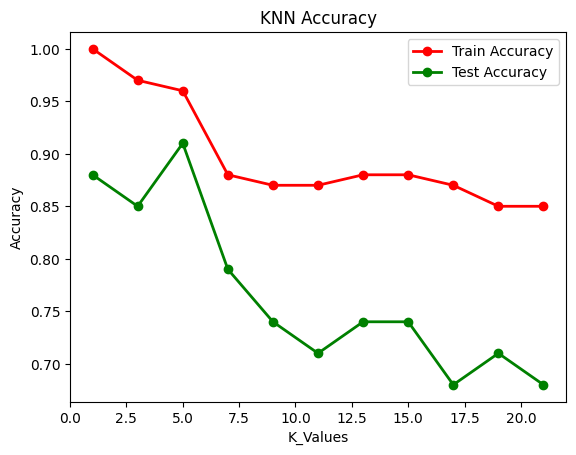

In [33]:
X = zoo_df.drop("type" , axis =1)
y = zoo_df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

SS = StandardScaler()

SS.fit(X_train)

X_train = SS.transform(X_train)
X_test = SS.transform(X_test)

X_train = pd.DataFrame(data=X_train , columns=X.columns)

X_test = pd.DataFrame(data=X_test , columns=X.columns)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

train_score = []
test_score = []
for i in range(1,23,2):
    knn = KNeighborsClassifier(n_neighbors=i )
    knn.fit(X_train , y_train)
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    test_acc  = accuracy_score(y_test , test_pred)
    train_acc = accuracy_score(y_train , train_pred)
    train_score.append(train_acc.round(2))
    test_score.append(test_acc.round(2))

plt.plot(range(1,23,2),train_score ,'ro-', label='Train Score', linewidth=2)
plt.plot(range(1,23,2),test_score ,'go-', label='Test Score', linewidth=2 )
plt.title("KNN Accuracy")
plt.xlabel("K_Values")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Test Accuracy"], loc ="upper right");

In [34]:
# Taking K = 5 as final K value

In [35]:
knn = KNeighborsClassifier(n_neighbors= 5 )
knn.fit(X_train , y_train)
test_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)
test_acc  = accuracy_score(y_test , test_pred)
train_acc = accuracy_score(y_train , train_pred)

In [36]:
print(f"Training Accuracy is --> {train_acc.round(2)}")
print(f"Testing Accuracy is --> {test_acc.round(2)}")

Training Accuracy is --> 0.96
Testing Accuracy is --> 0.91


In [37]:
cm_train = confusion_matrix(y_train , train_pred)
cm_test = confusion_matrix(y_test ,test_pred)

	 Training Confusion Matrix


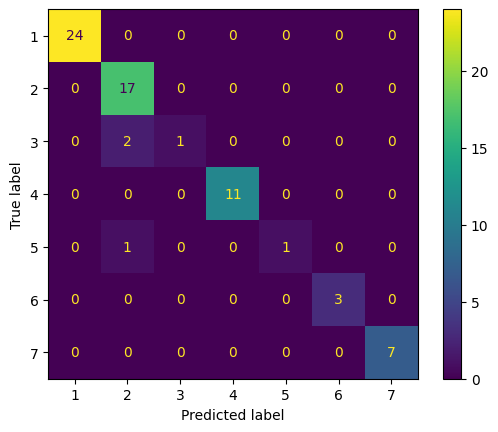

In [38]:
print("\t Training Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=knn.classes_)
disp.plot()
plt.show()

	 Testing Confusion Matrix


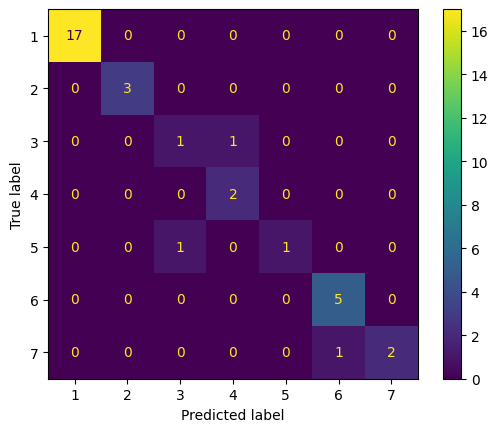

In [39]:
print("\t Testing Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=knn.classes_)
disp.plot()
plt.show()